In [108]:
# add necessary imports
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 1000)

In [109]:
#Read the data
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,Unnamed: 0,date,US,India,Germany,Italy,Australia
875,875,2022-06-15,85941290,43257730,27096571,17736696,7724035
876,876,2022-06-16,86057735,43270577,27124689,17773764,7753800
877,877,2022-06-17,86216418,43283793,27204953,17809934,7778643
878,878,2022-06-18,86230982,43296692,27204955,17844905,7801241
879,879,2022-06-19,86246101,43309473,27211896,17879160,7825659


In [110]:
# reference: https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
# beta/gamma is denoted as basic reproduction number.

N= 10000000 #10000000 # max susceptible population = It is also the country's entire population
I0=df_analyse.Germany[35] # No. of days required to get a total infections of around 100.
R0=0
S0=N-(I0+R0)
# condition I0+S0+R0=N0


beta=0.4   # infection spread dynamics = It represents how many people can be infected from a single person. (here 0.4 means 4 people can get infected from 1 person)
gamma=0.1  # recovery rate

ydata = np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata)) #time period


In [111]:
# SIR stands for S- susceptible, I - infected, R- recovered. The model suits perfectly for COVID scenario.
# NOTE: SIR model works on the assumption that recovered people will not get the infection again.
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: infected rate
        gamma: recovery rate
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N    
    dI_dt=beta*S*I/N-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

#Integrate the SIR equations over the time grid, t.
def fit_odeint(x, beta, gamma):
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [112]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([ 2.10000000e+01,  2.83470060e+01,  3.82643990e+01,  5.16514277e+01,
        6.97219301e+01,  9.41143798e+01,  1.27040417e+02,  1.71485319e+02,
        2.31478565e+02,  3.12458970e+02,  4.21767416e+02,  5.69311688e+02,
        7.68463404e+02,  1.03726781e+03,  1.40007516e+03,  1.88973976e+03,
        2.55058278e+03,  3.44238148e+03,  4.64573550e+03,  6.26927703e+03,
        8.45934211e+03,  1.14129145e+04,  1.53948962e+04,  2.07610549e+04,
        2.79883402e+04,  3.77146166e+04,  5.07901632e+04,  6.83433831e+04,
        9.18627538e+04,  1.23295611e+05,  1.65161012e+05,  2.20667313e+05,
        2.93813350e+05,  3.89433312e+05,  5.13118626e+05,  6.70918924e+05,
        8.68701114e+05,  1.11105924e+06,  1.39976184e+06,  1.73193630e+06,
        2.09849874e+06,  2.48359575e+06,  2.86576590e+06,  3.22096893e+06,
        3.52674095e+06,  3.76608036e+06,  3.92976253e+06,  4.01656973e+06,
        4.03182905e+06,  3.98513307e+06,  3.88806895e+06,  3.75244350e+06,
        3.58914408e+06,  

In [113]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])



C:\Users\Dheeraj\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_14976/1826737721.py:19: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_14976/1826737721.py:20: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N-gamma*I
C:\Users\Dheeraj\AppData\Local\Temp/ipykernel_14976/1826737721.py:21: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\Dheeraj\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [1.38890331e-04 8.23027186e-05]  start infect: 21
Optimal parameters: beta = 0.01473181529673744  and gamma =  -0.005358483809467921


In [114]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

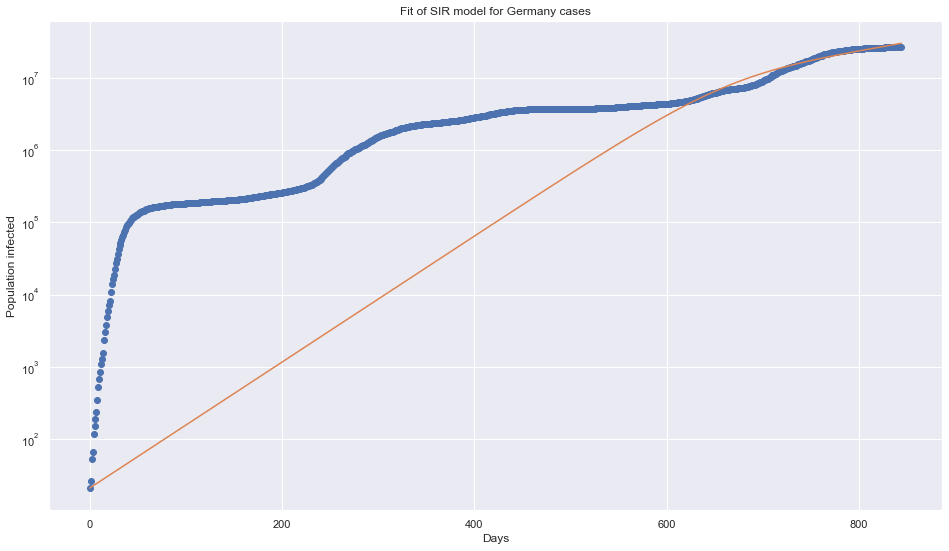

Optimal parameters: beta = 0.01473181529673744  and gamma =  -0.005358483809467921
Basic Reproduction Number R0  -2.749250687425378
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [115]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

In [138]:
x = np.zeros(35, dtype=int)
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [135]:
fitted.astype

<function ndarray.astype>

In [136]:
x.astype

<function ndarray.astype>

In [151]:
sdf = np.concatenate([x,fitted])
sdf

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.10000000e+01,
       2.14261622e+01, 2.18609726e+01, 2.23046069e+01, 2.27572439e+01,
       2.32190666e+01, 2.36902611e+01, 2.41710178e+01, 2.46615308e+01,
       2.51619978e+01, 2.56726211e+01, 2.61936067e+01, 2.67251648e+01,
       2.72675101e+01, 2.78208614e+01, 2.83854420e+01, 2.89614799e+01,
       2.95492076e+01, 3.01488623e+01, 3.07606860e+01, 3.13849256e+01,
      

In [152]:

df_analyse['SIR_Germany'] = sdf
data_path='../data/processed/small_table_updated.csv'

#df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)
df_analyse.to_csv(data_path, sep=';')

In [153]:
df_analyse.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,US,India,Germany,Italy,Australia,SIR_Italy,SIR_Germany
0,0,0,0,2020-01-22,1,0,0,0,0,0.0,0.0
1,1,1,1,2020-01-23,1,0,0,0,0,0.0,0.0
2,2,2,2,2020-01-24,2,0,0,0,0,0.0,0.0
3,3,3,3,2020-01-25,2,0,0,0,0,0.0,0.0
4,4,4,4,2020-01-26,5,0,0,0,4,0.0,0.0


In [148]:
df_analyse.sort_values('date',ascending=True).tail()

,Unnamed: 0,date,US,India,Germany,Italy,Australia,SIR_Germany
875,875,2022-06-15,85941290,43257730,27096571,17736696,7724035,2.955172e+07
876,876,2022-06-16,86057735,43270577,27124689,17773764,7753800,2.971245e+07
877,877,2022-06-17,86216418,43283793,27204953,17809934,7778643,2.987398e+07
878,878,2022-06-18,86230982,43296692,27204955,17844905,7801241,3.003630e+07
879,879,2022-06-19,86246101,43309473,27211896,17879160,7825659,3.019943e+07


In [150]:
df_analyse.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,date,US,India,Germany,Italy,Australia,SIR_Italy
0,0,0,0,2020-01-22,1,0,0,0,0,0.0
1,1,1,1,2020-01-23,1,0,0,0,0,0.0
2,2,2,2,2020-01-24,2,0,0,0,0,0.0
3,3,3,3,2020-01-25,2,0,0,0,0,0.0
4,4,4,4,2020-01-26,5,0,0,0,4,0.0


In [ ]:
#df_analyse['SIR_Italy'] = SIR_Italy
data_path='../data/processed/small_table_updated.csv'

#df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)
df_analyse.to_csv(data_path, sep=';')

In [154]:
df_analyse=pd.read_csv('../data/processed/small_table_updated.csv',sep=';', index_col=False)  
df_analyse.sort_values('date',ascending=True).tail()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,date,US,India,Germany,Italy,Australia,SIR_Italy,SIR_Germany
875,875,875,875,875,2022-06-15,85941290,43257730,27096571,17736696,7724035,1.817410e+07,2.955172e+07
876,876,876,876,876,2022-06-16,86057735,43270577,27124689,17773764,7753800,1.822659e+07,2.971245e+07
877,877,877,877,877,2022-06-17,86216418,43283793,27204953,17809934,7778643,1.827915e+07,2.987398e+07
878,878,878,878,878,2022-06-18,86230982,43296692,27204955,17844905,7801241,1.833177e+07,3.003630e+07
879,879,879,879,879,2022-06-19,86246101,43309473,27211896,17879160,7825659,1.838445e+07,3.019943e+07


In [ ]:
imports
read data
define SIR paramerts and function
scipy integrate odient over infection rates -> it gives 
optimise (get new beta & gamma)

again call ovre updated params
get fitted data & plot